In [1]:
import numpy as np
import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import os
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras import backend as K
import pickle
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
default_image_size=tuple((32, 32))
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)  
            
            return  img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [5]:
directory_root='PlantVillage'
image_list=[]
img_name=[]
list_img_filename=[]
list_2=[]

In [6]:
for  dirname,dis,filenames in os.walk(directory_root):
    #list_img_array.append(dirname)
    for filename in filenames:
     
        if filename.endswith(".jpg") == True or filename.endswith(".JPG") == True:
            image_list.append(convert_image_to_array(os.path.join(dirname,filename)))
            img_name.append(dirname)
            list_img_filename.append(filename)
            list_2.append(dis)
            

In [50]:
from sklearn.preprocessing import LabelEncoder

In [52]:
label_binarizer = LabelEncoder()
labels = label_binarizer.fit_transform(img_name)
pickle.dump(label_binarizer,open('label_trns.pkl','wb'))
n_classes = len(label_binarizer.classes_)

In [53]:
label_binarizer.classes_

array(['PlantVillage\\Pepper__bell___Bacterial_spot',
       'PlantVillage\\Pepper__bell___healthy',
       'PlantVillage\\Potato___Early_blight',
       'PlantVillage\\Potato___Late_blight',
       'PlantVillage\\Potato___healthy',
       'PlantVillage\\Tomato_Bacterial_spot',
       'PlantVillage\\Tomato_Early_blight',
       'PlantVillage\\Tomato_Late_blight',
       'PlantVillage\\Tomato_Leaf_Mold',
       'PlantVillage\\Tomato_Septoria_leaf_spot',
       'PlantVillage\\Tomato_Spider_mites_Two_spotted_spider_mite',
       'PlantVillage\\Tomato__Tomato_YellowLeaf__Curl_Virus',
       'PlantVillage\\Tomato_healthy'], dtype='<U56')

In [54]:
from sklearn.decomposition import PCA

In [55]:
X=np.array(image_list)

In [56]:
X=np.array(image_list)

In [57]:
X=X/255

In [58]:
np.min(X)

0.0

In [59]:
np.max(X)

1.0

In [60]:
X.shape

(18859, 32, 32, 3)

In [61]:
X_flat = X.reshape(-1,3072)

In [62]:
feat_cols=['pixel'+str(i) for i in range(X.shape[1])]

In [63]:
df_X=pd.DataFrame(X_flat)

In [64]:
df_X

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.501961,0.490196,0.549020,0.466667,0.454902,0.513726,0.478431,0.466667,0.525490,0.454902,...,0.635294,0.635294,0.603922,0.647059,0.615686,0.580392,0.631373,0.623529,0.588235,0.639216
1,0.600000,0.509804,0.564706,0.603922,0.513726,0.568627,0.560784,0.462745,0.517647,0.635294,...,0.533333,0.552941,0.478431,0.545098,0.592157,0.509804,0.568627,0.537255,0.454902,0.513726
2,0.113725,0.054902,0.094118,0.066667,0.058824,0.054902,0.058824,0.062745,0.086275,0.568627,...,0.768627,0.788235,0.721569,0.756863,0.784314,0.717647,0.752941,0.811765,0.745098,0.780392
3,0.031373,0.023529,0.019608,0.200000,0.141176,0.176471,0.490196,0.376471,0.447059,0.450980,...,0.780392,0.658824,0.568627,0.623529,0.650980,0.560784,0.615686,0.623529,0.533333,0.588235
4,0.615686,0.611765,0.650980,0.678431,0.674510,0.713726,0.647059,0.639216,0.686275,0.623529,...,0.513726,0.458824,0.447059,0.505882,0.513726,0.501961,0.560784,0.400000,0.388235,0.447059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18854,0.537255,0.505882,0.533333,0.447059,0.415686,0.443137,0.529412,0.498039,0.525490,0.541176,...,0.658824,0.619608,0.592157,0.619608,0.647059,0.619608,0.647059,0.607843,0.580392,0.607843
18855,0.478431,0.482353,0.474510,0.466667,0.470588,0.462745,0.466667,0.470588,0.462745,0.478431,...,0.596078,0.600000,0.607843,0.607843,0.549020,0.556863,0.556863,0.568627,0.576471,0.576471
18856,0.517647,0.501961,0.545098,0.529412,0.513726,0.556863,0.549020,0.533333,0.576471,0.552941,...,0.466667,0.364706,0.368627,0.423529,0.372549,0.376471,0.431373,0.396078,0.400000,0.454902
18857,0.525490,0.529412,0.521569,0.545098,0.549020,0.541176,0.537255,0.537255,0.537255,0.513726,...,0.423529,0.431373,0.423529,0.423529,0.400000,0.400000,0.400000,0.411765,0.411765,0.411765


In [65]:
len(labels)

18859

In [66]:
pca_X=PCA(n_components=2)
PCA_X=pca_X.fit_transform(df_X.iloc[:,:-1])

In [74]:
p_x_df=pd.DataFrame(data=PCA_X,columns=['pc1','pc2'])

In [81]:
p_x_df['z']=labels

In [82]:
plt.figure(figsize=(30,30))

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

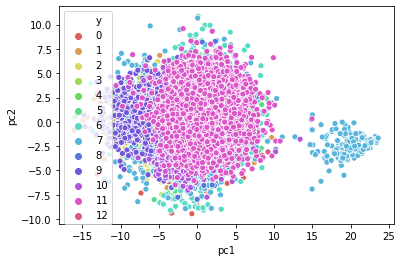

In [89]:
sns.scatterplot(
x='pc1',y='pc2',
hue="y",
palette=sns.color_palette("hls",13),
data=p_x_df,
legend="full",
alpha=1
    


)